# Soal 1. Menentukan jenis data categorical atau numeric
Jelaskan data kategorikal (kualitatif) dan data numerik (kuantitatif)



Jawab disini:

Data kategorikal merupakan data yang mencerminkan karakteristik seperti bahasa, jenis kelamin seseorang, warna rambut seseorang, atau nilai numerik bulat yang tidak memiliki makna matematis seperti 1 untuk laki-laki dan 0 untuk perempuan

Data Nominal merupakan data yang tidak memiliki order dan berbentuk label tanpa adanya tingkatan perangkingan.




---



---



---



Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=19Yc404D3U3OPPoUP8J1pXETlTmA4hOOX)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   object
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [4]:
df = df.sample(1000)

<h2>Soal 2. Visualisasi Scatter Plot dengan memiliki missing value </h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' dan 'na' yang dianggap sebagai missing value,  namun data ini tidak bisa di ubah ke bentuk float, maka ubahlah data tersebut menjadi NaN dengan menambahkan argumen na_values=['na', '-'] saat menggunakan atribut pd.read_csv('nama file.csv'. na_values=..]
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

a. Buahlah visualisasi scatter plot menggunakan sample(1000), sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


b. Kemudian bandingkan data visualisasi diatas dengan visualisasi data (sample=1000) setelah handling missing value menggunakan:
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

#                     **Expected output**

#                     **Tanpa Handling missing value**

![tanpa handling missing value](https://drive.google.com/uc?id=1FYJkCwAfm8f3jyNdzOnCvp15hS_DixHr)

##                    **Dengan Handling missing value**
![dengan handling missing value](https://drive.google.com/uc?id=1nqZuPdBsqSsOud-_XuBGujDAcJWEEvIr)

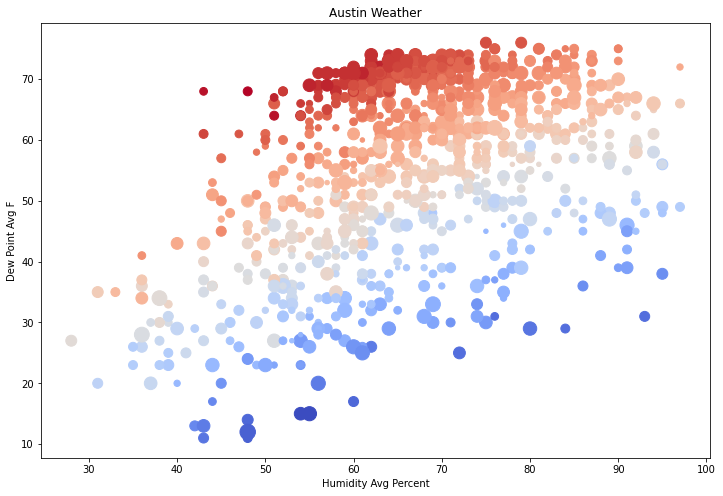

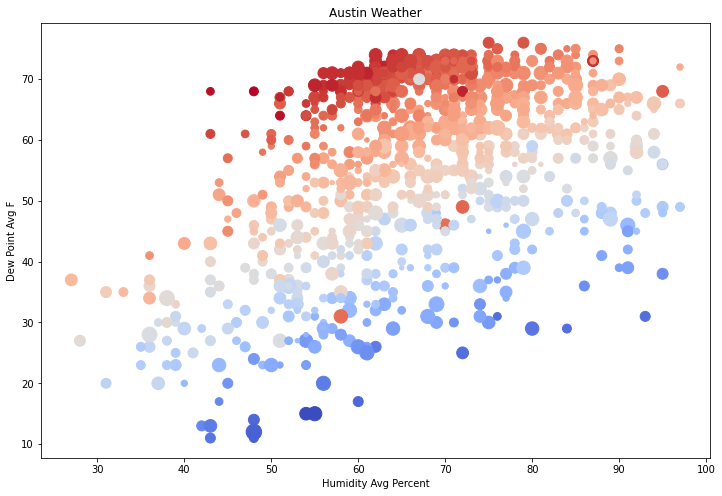

In [57]:
import seaborn as sns
# code here
df_new = pd.read_csv('austin_weather.csv', na_values=('na', '-'))
df_new['DewPointAvgF'] = df_new['DewPointAvgF'].astype('float')
df_new['HumidityAvgPercent'] = df_new['HumidityAvgPercent'].astype('float')
df_new['WindAvgMPH'] = df_new['WindAvgMPH'].astype('float')


#df sample 1000
df_new_samp = df_new.sample(1000)

#data yg belum di handle missing value
fig, ax = plt.subplots(figsize=(12, 8))
c= df_new_samp['TempAvgF']
g = df_new_samp['WindAvgMPH'].values *20


plt.scatter(data=df_new_samp ,x='HumidityAvgPercent', y='DewPointAvgF',c=c, cmap='coolwarm', sizes=g)
ax.set_title('Austin Weather')
ax.set_ylabel('Dew Point Avg F')
ax.set_xlabel('Humidity Avg Percent')
plt.show()

#data yg sudah di handle missing value
df_ffill = df_new_samp.fillna(method='ffill')


fig, ax2 = plt.subplots(figsize=(12, 8))
c= df_ffill['TempAvgF']
g = df_ffill['WindAvgMPH'].values *20


plt.scatter(data=df_ffill ,x='HumidityAvgPercent', y='DewPointAvgF',c=c, cmap='coolwarm', sizes=g)
ax2.set_title('Austin Weather')
ax2.set_ylabel('Dew Point Avg F')
ax2.set_xlabel('Humidity Avg Percent')
plt.show()



Analisa : 

Download [price.csv](https://drive.google.com/uc?export=download&id=1LfuQmLb8AZxAvJzgWJ3u4h49EoTGqO-R)

In [5]:
df2 = pd.read_csv('price.csv')
df2.head()


,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


---

<h2>Soal 3. Visualisasi Data with Handling outliers </h2>

Pada tugas kali ini, kita akan melakukan handling outliers. Outliers ditemukan pada kolom 'House_Price' dengan menggunakan boxplot dari library seaborn seperti gambar berikut: 


![boxplot1](https://drive.google.com/uc?id=1y2jRwf8zRPXQtSBkmjJLcqUm4l6DR7d9)


Dengan menggunakan Interquartile range, kita bisa temukan nilai data outliers dan meremove data outlier tersebut. 

*   Tentukan nilai batas atas dan batas bawah dari Interquartile range tersebut
*   Remove data outliers tersebut menggunakan batas atas dan batas bawah
*   Visualisasikan hasil data yang sudah d remove outliers seperti expected berikut:







**EXPECTED OUTPUT:**

Batas bawah & batas atas:

871625.0 10976625.0

Visualisasi boxplot:

![boxplot2](https://drive.google.com/uc?id=1qZc-lEa5FUzSQ_cyt4_GJQ0TZ8c6WjHX)





871625.0 10976625.0


<AxesSubplot:xlabel='House_Price'>

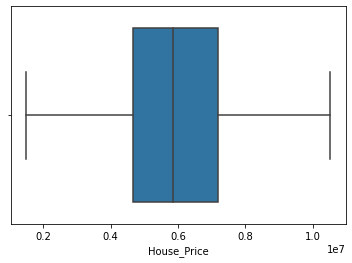

In [9]:
#Code here


#lower dan upper bound
q1 = df2['House_Price'].quantile(0.25)
q3 = df2['House_Price'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(lower_bound,upper_bound)

#remove data outliers
df_filter = df2[(df2['House_Price']<upper_bound) & (df2['House_Price']>lower_bound)]
df_filter

import seaborn as sns
sns.boxplot(x='House_Price', data=df_filter)
